In [1]:
!python --version

Python 3.5.4 :: Anaconda, Inc.


In [29]:
import pandas as pd
import numpy as np
import matplotlib
import ast
import re

In [3]:
tweets = pd.read_csv('../data/external/csv_datas_full.csv', sep = '\t', low_memory=False)

In [4]:
tweets[:5].head()

,tweet_id,tweet_creation_dt,tweet_source,tweet_language,tweet_text,tweet_location_coordinates,tweet_quote_count,tweet_reply_count,tweet_retweet_count,tweet_favorite_count,...,quoted_tweet_publisher_nickname,quoted_tweet_publisher_location,quoted_tweet_publisher_description,quoted_tweet_publisher_declared_language,quoted_tweet_publisher_followers_count,quoted_tweet_publisher_friends_count,quoted_tweet_publisher_listed_count,quoted_tweet_publisher_favourites_count,quoted_tweet_publisher_tweet_count,quoted_tweet_publisher_account_creation_dt
0,580141359983501312,23/03/2015 22:57:33,dlvr.it,fr,JO 2024 : nouvelle étape vers la candidature d...,NaN,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,580140029084729344,23/03/2015 22:52:16,Google,fr,http://t.co/opWYuQtXHd Hidalgo favorable à une...,NaN,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,580136498105843712,23/03/2015 22:38:14,Twitter for Android,fr,"JO 2024 : Hidalgo veut ""engager pleinement"" Pa...",NaN,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,580133490668232704,23/03/2015 22:26:17,iOS,fr,"""Hidalgo veut ""engager pleinement"" Paris vers ...",NaN,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,580130710264004608,23/03/2015 22:15:14,WordPress.com,fr,JO 2024 : nouvelle étape vers la candidature d...,NaN,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
tweets.dtypes

tweet_id                                        int64
tweet_creation_dt                              object
tweet_source                                   object
tweet_language                                 object
tweet_text                                     object
tweet_location_coordinates                     object
tweet_quote_count                               int64
tweet_reply_count                               int64
tweet_retweet_count                             int64
tweet_favorite_count                            int64
tweet_used_hashtags_list                       object
tweet_user_mentions_list                       object
publisher_id                                    int64
publisher_name                                 object
publisher_nickname                             object
publisher_location                             object
publisher_description                          object
publisher_declared_language                    object
publisher_followers_count   

In [6]:
tweets.shape

(36219, 51)

## Première statistique rapide

### Langue

In [7]:
tweets['tweet_language'].value_counts()

fr    36219
Name: tweet_language, dtype: int64

### Tweets source

In [8]:
tweets['tweet_source'].value_counts().head(20)

Twitter Web Client                  11840
Twitter for iPhone                   9621
Twitter for Android                  6459
TweetDeck                            1692
Twitter for iPad                      745
IFTTT                                 652
Hootsuite                             631
erased13906048                        597
Facebook                              470
Buffer                                349
Twitter Lite                          341
Hobbynote Engage                      225
Linkis: turn sharing into growth      167
Instagram                             165
Twitter for Windows Phone             131
LinkedIn                              127
dlvr.it                               126
twitterfeed                           118
Media Studio                          104
Scoop.it                               99
Name: tweet_source, dtype: int64

In [9]:
tweets['tweet_source'].value_counts().tail(20)

Blog2Social APP                   1
Havia Fotocopy                    1
Toute l'Actualité - auto tweet    1
Fenix 2                           1
Twidere for Android #4            1
DeltaCandiceApps70                1
WhiteBeard CMS                    1
SharedBy                          1
art_amallaid                      1
Get Reach                         1
Twitter for Nokia S40             1
Commun.it Intelligence            1
Saezuri                           1
Puremédias (publi articles)       1
tomogadenapps                     1
maloresapps                       1
Telebruxelles_web                 1
YoungLeaders                      1
Twitter Ads Composer              1
BopizKenzaApps64                  1
Name: tweet_source, dtype: int64

### Reply

In [10]:
tweets.groupby('tweet_is_reply').size()

tweet_is_reply
0    32219
1     4000
dtype: int64

### Longueur tweet

In [11]:
tweets['tweet_text'].apply(len).describe()

count    36219.000000
mean       142.055606
std         50.112228
min         17.000000
25%        116.000000
50%        136.000000
75%        157.000000
max        811.000000
Name: tweet_text, dtype: float64

In [12]:
def firstDayOfMonth(datetime):
    return datetime.date().replace(day = 1)

tweets['tweet_creation_month'] = pd.to_datetime(tweets['tweet_creation_dt']).apply(firstDayOfMonth)

In [13]:

tweets_len = tweets.groupby('tweet_creation_month')['tweet_text'].agg({
    lambda x: np.mean(x.apply(lambda x : len(x))),
    len
})


In [14]:
tweets_len.columns = ['tweet_text_longueur', 'effectif']
tweets_len.head()

,tweet_text_longueur,effectif
tweet_creation_month,,
2015-01-01,122.946809,94
2015-02-01,120.155963,218
2015-03-01,113.700000,650
2015-04-01,120.932668,802
2015-05-01,125.053571,336


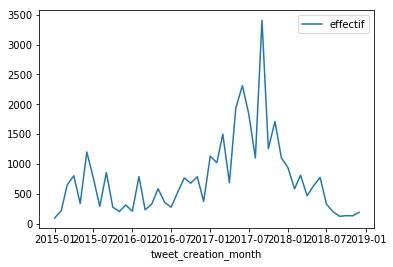

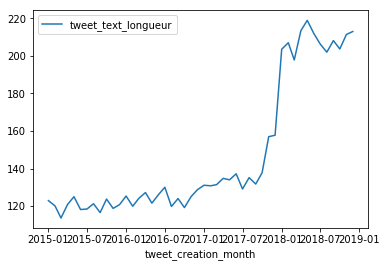

In [28]:
tweets_len.plot(y = 'effectif', use_index=True)
tweets_len.plot(y = 'tweet_text_longueur', use_index=True)

### Nombre de "mot"

In [73]:
tweets['tweet_text'].apply(lambda t: len(re.findall('\w+', t))).describe()

count    36219.000000
mean        21.651536
std          7.679178
min          3.000000
25%         17.000000
50%         21.000000
75%         24.000000
max         89.000000
Name: tweet_text, dtype: float64

In [75]:
def roughWordCount(x):
    x = re.sub(r'(https?|@|#)\S+', '', x)
    return len(re.findall(r'\w+', x))

In [76]:
tweets['tweet_text'].apply(roughWordCount).describe()

count    36219.000000
mean        14.721141
std          7.476548
min          0.000000
25%         10.000000
50%         13.000000
75%         18.000000
max         56.000000
Name: tweet_text, dtype: float64

### Likes

In [16]:
tweets.groupby(tweets['tweet_favorite_count'] > 0).size()

tweet_favorite_count
False    15488
True     20731
dtype: int64

In [17]:
tweets[tweets['tweet_favorite_count'] > 0]['tweet_favorite_count'].describe()

count    20731.000000
mean        15.602576
std         87.624517
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
max       5182.000000
Name: tweet_favorite_count, dtype: float64

## Répartition des hashtags

In [18]:
hashtags = tweets['tweet_used_hashtags_list']

In [19]:
all_hastags = list()
for el in hashtags:
    el = ast.literal_eval(el)
    if len(el) > 0:
        all_hastags.extend(el)

In [20]:
hashtags = pd.DataFrame(all_hastags, columns=['hashtag'])

In [21]:
hashtags['hashtag_lower_case'] = hashtags['hashtag'].str.lower()

In [22]:
hashtags.groupby('hashtag_lower_case')['hashtag_lower_case'].count().reset_index(name = 'count').sort_values(['count'], ascending=False)

,hashtag_lower_case,count
5041,paris2024,20695
3573,jo2024,10507
5012,paris,2334
6317,sport,1652
3561,jo,1049
4804,olympicday,680
2112,enmodejo,626
2909,grandparis,607
1277,cio,499
3616,jouerlejeu,467


## Répartion des mentions

In [23]:
mentions = tweets['tweet_user_mentions_list']

In [24]:
all_mentions = list()
for el in mentions:
    el = ast.literal_eval(el)
    if len(el) > 0:
        all_mentions.extend(el)

In [25]:
mentions = pd.DataFrame(all_mentions, columns=['mention'])

In [26]:
mentions['mention_lower_case'] = mentions['mention'].str.lower()

In [27]:
mentions.groupby('mention_lower_case')['mention_lower_case'].count().reset_index(name = 'count').sort_values(['count'], ascending=False)

,mention_lower_case,count
4771,paris2024,2474
393,anne_hidalgo,1335
4765,paris,820
6073,tonyestanguet,820
1922,emmanuelmacron,378
2389,franceolympique,377
2270,flessellaura,366
6491,vpecresse,279
2917,iledefrance,243
6221,unss,191


## Répartition des mots (mode brouillon)

In [78]:
all_words = list()
for tweet in tweets['tweet_text']:
    tweet = re.sub(r'(https?|@|#)\S+', '', tweet)
    tweet_list = re.findall(r'\w+', tweet)
    all_words.extend(tweet_list)

In [86]:
words = pd.DataFrame(all_words, columns=['word'])
words['word_lower'] = words['word'].str.lower()

In [88]:
words_group = words.groupby('word_lower')['word_lower'].count().reset_index(name = 'count').sort_values(['count'], ascending=False)

In [96]:
words_group['percentage'] = words_group['count'] / words_group['count'].sum()

In [98]:
words_group.describe()

,count,percentage
count,23832.000000,23832.000000
mean,22.372650,0.000042
std,355.210939,0.000666
min,1.000000,0.000002
25%,1.000000,0.000002
50%,2.000000,0.000004
75%,5.000000,0.000009
max,27352.000000,0.051299


In [100]:
words_group[words_group['count'] > 50].shape

(1057, 3)

In [102]:
words_group[words_group['count'] > 50].tail(20)

,word_lower,count,percentage
12314,journées,51,0.000096
4871,clip,51,0.000096
21790,train,51,0.000096
8933,exposition,51,0.000096
12586,laisse,51,0.000096
22249,up,51,0.000096
12961,live,51,0.000096
21892,travers,51,0.000096
9949,fédérations,51,0.000096
13894,mesures,51,0.000096
